**Part** **1**

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(x_train, y_train), (x_test, y_test) = datasets.fashion_mnist.load_data()

x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)).astype('float32') / 255
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)).astype('float32') / 255

In [ ]:
model = models.Sequential()


model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))


model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))


model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.7432 - loss: 0.7064 - val_accuracy: 0.8673 - val_loss: 0.3745
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.8789 - loss: 0.3320 - val_accuracy: 0.8873 - val_loss: 0.3155
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8988 - loss: 0.2817 - val_accuracy: 0.8920 - val_loss: 0.2994
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9081 - loss: 0.2497 - val_accuracy: 0.8972 - val_loss: 0.2913
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9200 - loss: 0.2173 - val_accuracy: 0.9015 - val_loss: 0.2672
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9255 - loss: 0.1990 - val_accuracy: 0.9112 - val_loss: 0.2505
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9337 - loss: 0.1790 - val_accuracy: 0.8977 - val_loss: 0.2839
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9367 - loss: 0.170

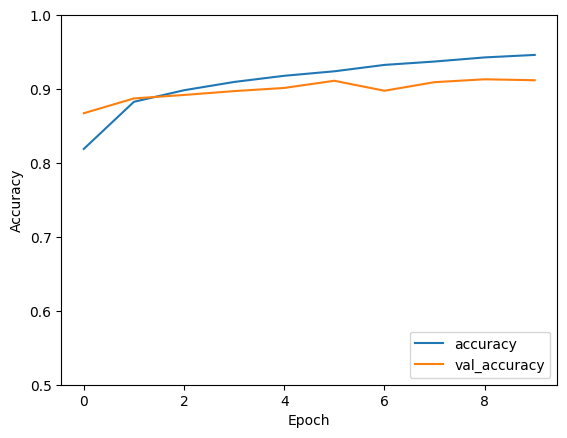

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()


In [ ]:
predictions = model.predict(x_test)
predicted_classes = predictions.argmax(axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


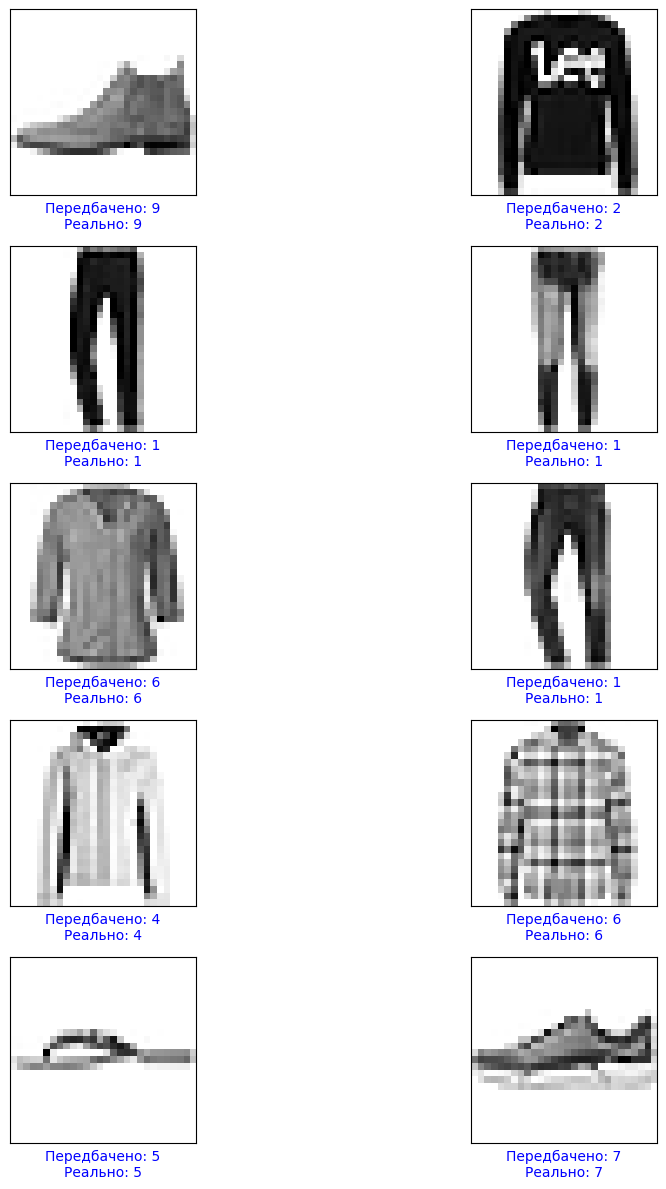

In [ ]:
def plot_image(predicted_class, true_label, img):
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)

    color = 'blue' if predicted_class == true_label else 'red'
    plt.xlabel(f"Передбачено: {predicted_class}\nРеально: {true_label}", color=color, fontsize=10)


plt.figure(figsize=(12, 12))
for i in range(10):
    plt.subplot(5, 2, i + 1)
    plot_image(predicted_classes[i], y_test[i], x_test[i].reshape(28, 28))

plt.tight_layout()
plt.show()



**PART 2**

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [11]:

x_train = np.stack([x_train]*3, axis=-1)
x_test = np.stack([x_test]*3, axis=-1)


x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train = tf.image.resize(x_train, (32, 32))
x_test = tf.image.resize(x_test, (32, 32))

In [12]:
vg = VGG16(weights='imagenet', include_top=False, input_shape=(32,32,3))
vg.trainable = False


In [13]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ vgg16 (Functional)                   │ (None, 1, 1, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,781,642 (56.39 MB)

 Trainable params: 66,954 (261.54 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [14]:
inputs = tf.keras.Input(shape=(32,32,3))
layer = vg(inputs)
layer = Flatten()(layer)
layer = Dense(128, activation = 'relu')(layer)
layer = Dropout(0.5)(layer)
outputs = Dense(10, activation = 'softmax')(layer)
model = tf.keras.Model(inputs, outputs)

In [15]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
history = model.fit(x_train, y_train, epochs=25, batch_size=64,
                      validation_data=(x_test, y_test))

Epoch 1/25
938/938 ━━━━━━━━━━━━━━━━━━━━ 19s 16ms/step - accuracy: 0.6650 - loss: 0.9663 - val_accuracy: 0.8222 - val_loss: 0.4873
Epoch 2/25
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.8152 - loss: 0.5253 - val_accuracy: 0.8332 - val_loss: 0.4498
Epoch 3/25
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.8279 - loss: 0.4726 - val_accuracy: 0.8486 - val_loss: 0.4127
Epoch 4/25
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.8399 - loss: 0.4417 - val_accuracy: 0.8515 - val_loss: 0.4020
Epoch 5/25
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.8459 - loss: 0.4226 - val_accuracy: 0.8530 - val_loss: 0.3931
Epoch 6/25
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.8466 - loss: 0.4172 - val_accuracy: 0.8546 - val_loss: 0.3895
Epoch 7/25
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.8514 - loss: 0.4081 - val_accuracy: 0.8574 - val_loss: 0.3878
Epoch 8/25
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.8551 - loss: 0.3927 - 

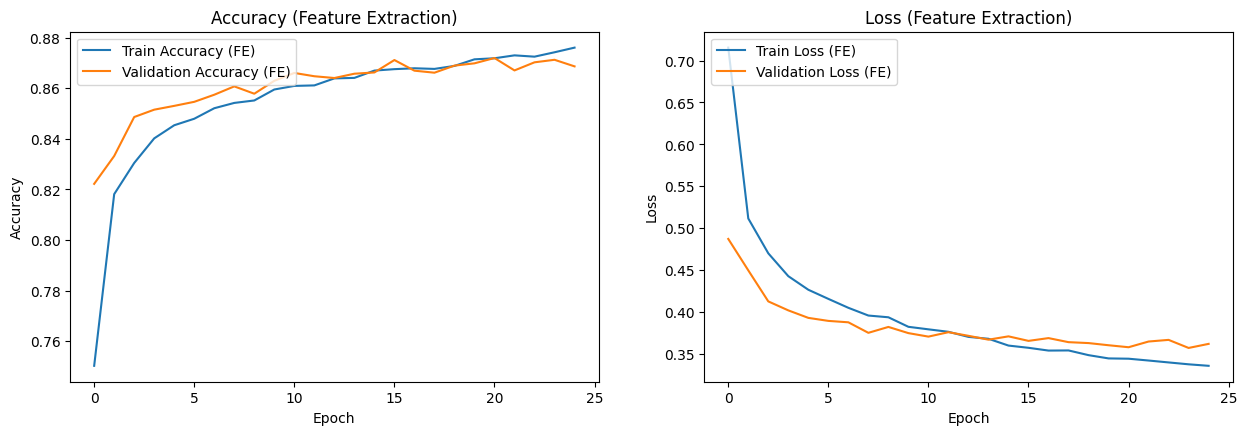

In [18]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy (FE)')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy (FE)')
plt.title('Accuracy (Feature Extraction)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.subplot(2, 2, 2)
plt.plot(history.history['loss'], label='Train Loss (FE)')
plt.plot(history.history['val_loss'], label='Validation Loss (FE)')
plt.title('Loss (Feature Extraction)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


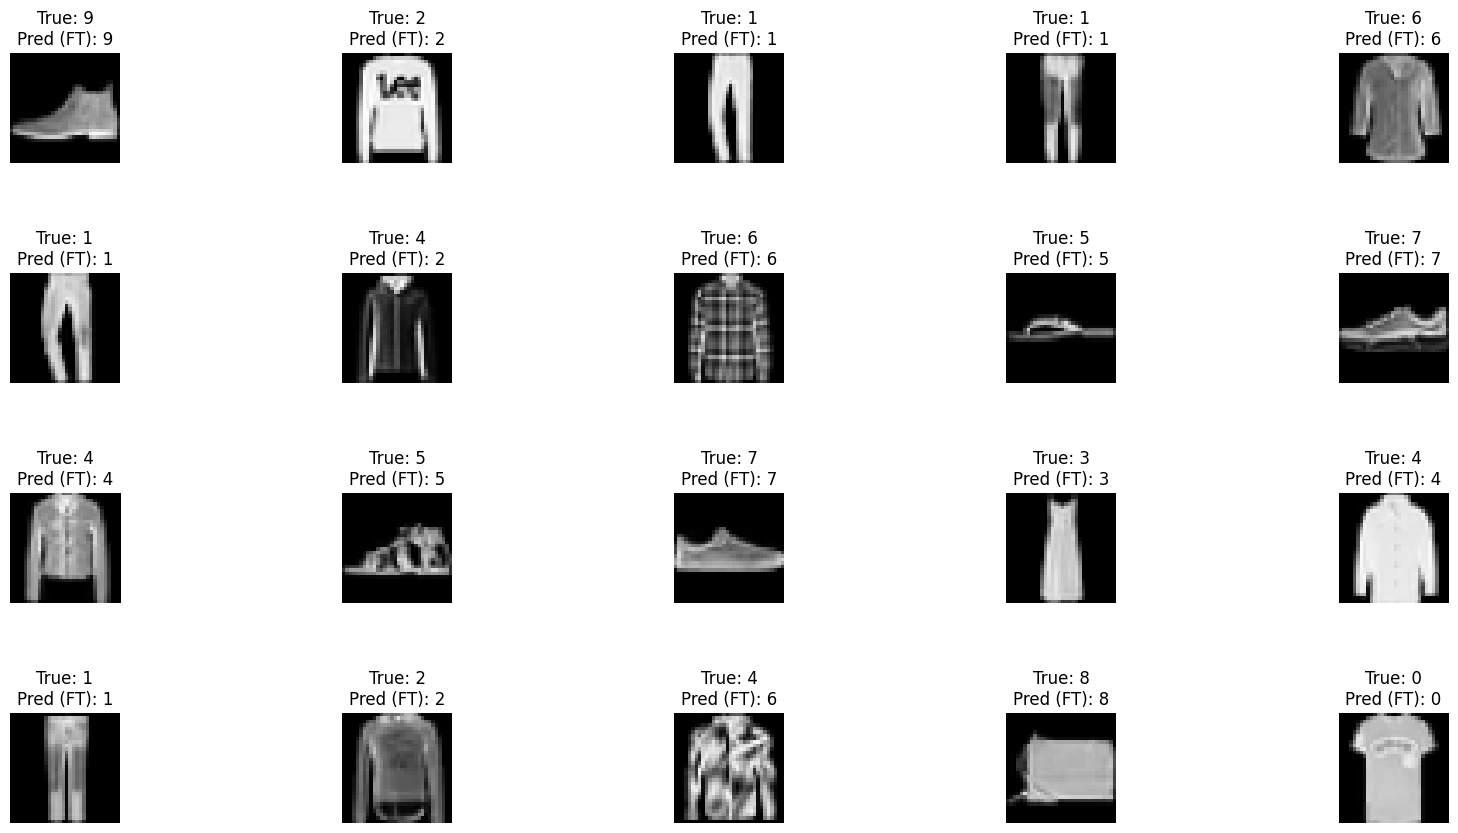

In [20]:
predictions_ft = model.predict(x_test[:20])
predicted_labels_ft = np.argmax(predictions_ft, axis=1)
true_labels_ft = np.argmax(y_test[:20], axis=1)

plt.figure(figsize=(20, 10))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(x_test[i])
    plt.title(f"True: {true_labels_ft[i]}\nPred (FT): {predicted_labels_ft[i]}")
    plt.axis('off')
plt.subplots_adjust(wspace=0.5, hspace=1.0)
plt.show()